In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns

/home/thomas/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
cars_file = "https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv"
cars = pd.read_csv(cars_file)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: xlabel='wt', ylabel='mpg'>

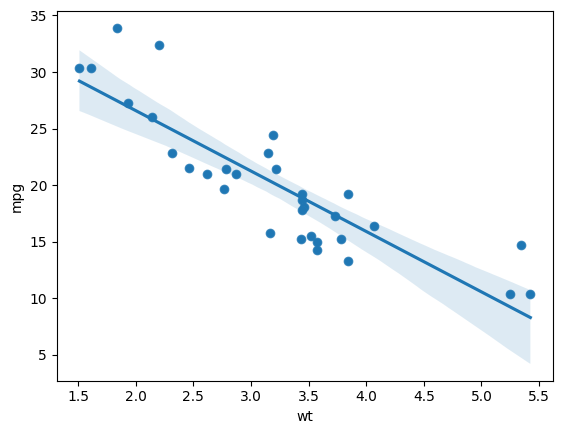

In [3]:
sns.scatterplot(x="wt", y="mpg", data=cars)
sns.regplot(x="wt", y="mpg", data=cars)

In [4]:
X_list = cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1, 1)
X_np.shape
y_list = cars.mpg.values.tolist()

X = torch.from_numpy(X_np)
y = torch.tensor(y_list)

In [17]:
w = torch.rand(1, requires_grad=True, dtype=torch.float32)
b = torch.rand(1, requires_grad=True, dtype=torch.float32)

num_epochs = (
    1000  # once all the data completely fetched to the models, then it calls epoch
)
learning_rate = 0.001

for epoch in range(num_epochs):
    for i in range(len(X)):  # batch size = 1
        y_pred = X[i] * w + b  # forward pass
        # calculate loss
        loss_tensor = torch.pow(y_pred - y[i], 2)
        # print("loss tensor: ", loss_tensor, "loss tensor data: ", loss_tensor.data)
        # backward pass
        loss_tensor.backward()

        # extract losses
        loss_value = loss_tensor.data[0]

        # update weight and bias
        with torch.no_grad():
            w -= learning_rate * w.grad
            b -= learning_rate * b.grad

            # zero the gradients
            w.grad.zero_()
            b.grad.zero_()
        print("loss value", loss_value)

loss value tensor(402.3803)
loss value tensor(385.8427)
loss value tensor(456.3114)
loss value tensor(366.5071)
loss value tensor(251.0884)
loss value tensor(219.6989)
loss value tensor(110.9648)
loss value tensor(429.7871)
loss value tensor(350.2113)
loss value tensor(205.5586)
loss value tensor(157.9877)
loss value tensor(98.6252)
loss value tensor(121.0837)
loss value tensor(72.1615)
loss value tensor(0.9304)
loss value tensor(0.3786)
loss value tensor(25.1196)
loss value tensor(779.6586)
loss value tensor(712.4857)
loss value tensor(874.3016)
loss value tensor(243.5824)
loss value tensor(50.7334)
loss value tensor(46.4935)
loss value tensor(14.7138)
loss value tensor(92.2311)
loss value tensor(478.7794)
loss value tensor(395.0220)
loss value tensor(656.9288)
loss value tensor(43.1022)
loss value tensor(129.3689)
loss value tensor(18.6499)
loss value tensor(162.7007)
loss value tensor(158.2733)
loss value tensor(135.7716)
loss value tensor(220.9288)
loss value tensor(112.0993)
loss 

In [18]:
print("Weight", w.item(), b.item())

Weight -5.229609966278076 36.80610656738281


In [6]:
# make sure GraphViz is installed (https://graphviz.org/download/)
# if not computer restarted, append directly to PATH variable
# import os
# from torchviz import make_dot
# os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin'
# make_dot(loss_tensor)